In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

import util

FOLDER = "/Users/brendan/Documents/projects/trails_project/data/series/"

SIZE = 10000

# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/sayak_full_svd|2025-04-29/data.json"
# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/svd_100|2025-05-06/data.json"

# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/svd_data|2025-03-06/data.json"

datafiles = [
    "costs_run|2025-05-28/data.json",
]

In [2]:
dfs = [
    util.load_data(FOLDER + datafile) for datafile in datafiles
]
df = pd.concat(dfs)
util.describe(df)

ratios: [100.0]
patch recovery: [0.001]
max costs: [1.25 1.5 2.0 3.0 5.0 9.0 17.0 33.0]
boundary conditions: ['SOLID']
num locations: [10]
random walker seeds: 1
random locations seeds: 1
patch recovery logic: ['LINEAR']
steps: 5000


In [3]:
df.columns

Index(['averageTravelCost', 'averageTravelLength', 'totalImprovement',
       'thresholdImprovement', 'steps', 'paths', 'weightedHeadings',
       'avgHeading', 'avgSquareHeading', 'patches',
       'settings.patchImprovement', 'settings.patchRecovery',
       'settings.maxCost', 'settings.boundaryConditions',
       'settings.numLocations', 'settings.randomSeedWalkers',
       'settings.randomSeedLocations', 'settings.recoveryLogic',
       'settings.improvementLogic', 'ratio'],
      dtype='object')

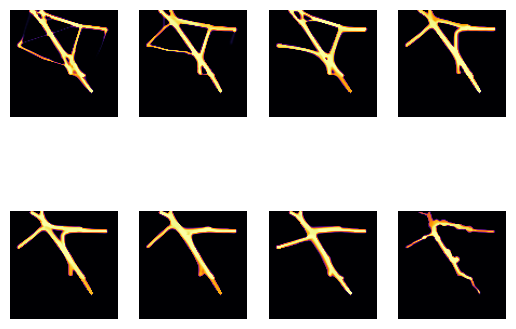

In [4]:
util.plot_patches(df[(df["steps"] == 5000) & (df["settings.randomSeedLocations"] == 1) & (df["settings.randomSeedWalkers"] == 1)]);

0


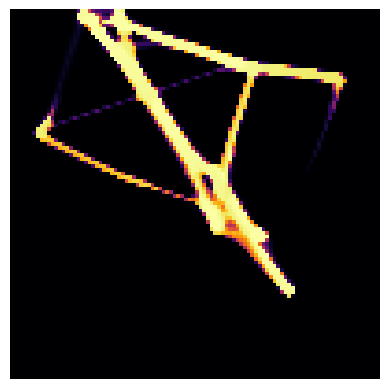

1


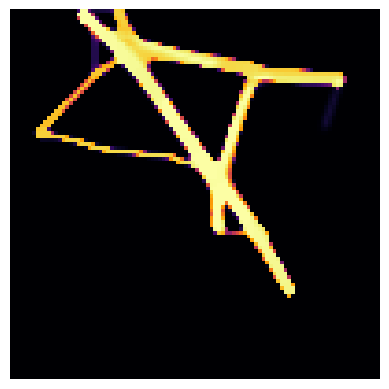

2


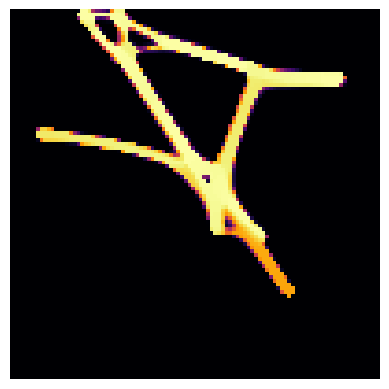

3


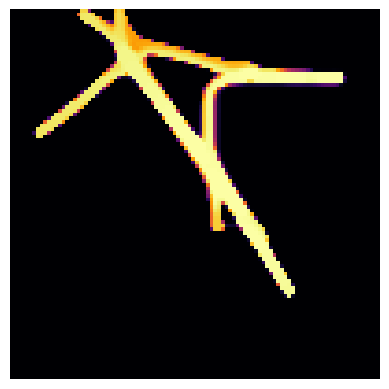

4


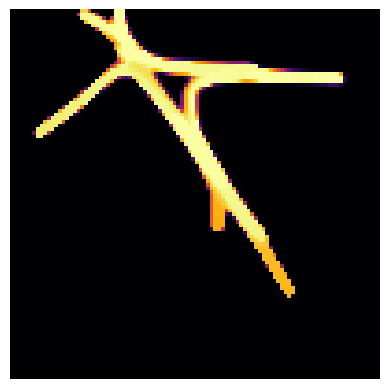

5


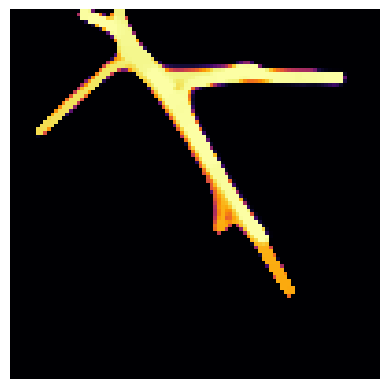

6


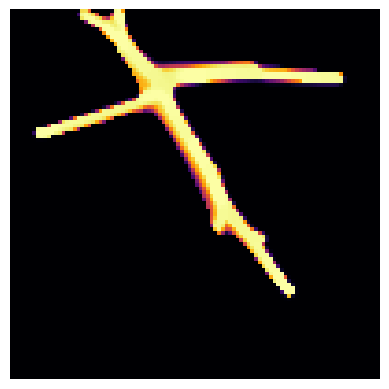

7


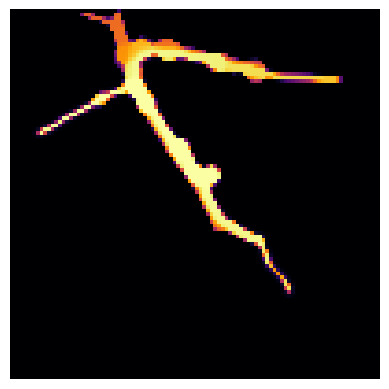

In [5]:
_df = df[(df["steps"] == 5000) & (df["settings.randomSeedLocations"] == 1) & (df["settings.randomSeedWalkers"] == 1)]
for i in range(len(_df)):
    print(i)
    plt.imshow(np.reshape(_df["patches"].iloc[i], (100, 100)), cmap="inferno")
    plt.axis('off')
    plt.show()

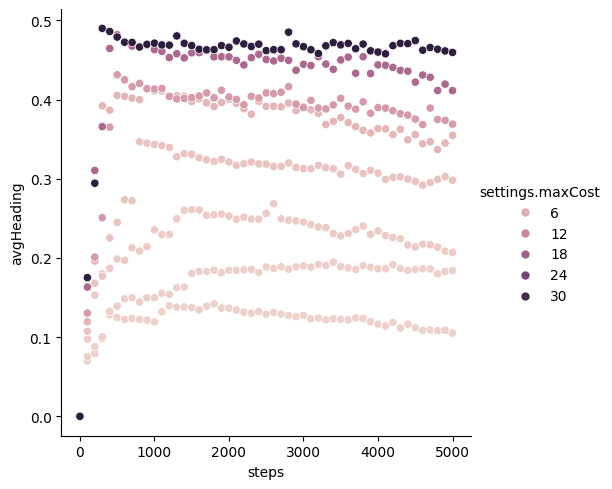

In [6]:
sns.relplot(data=df, y="avgHeading", x="steps", hue="settings.maxCost")

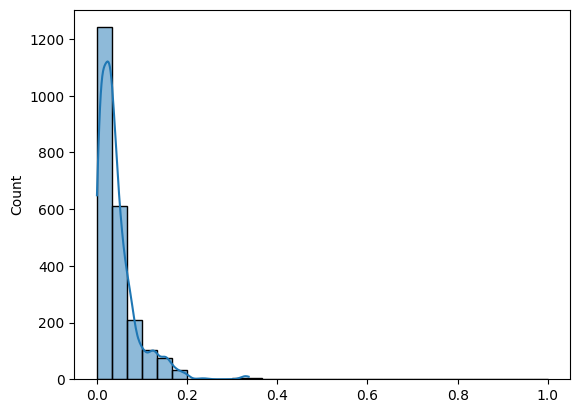

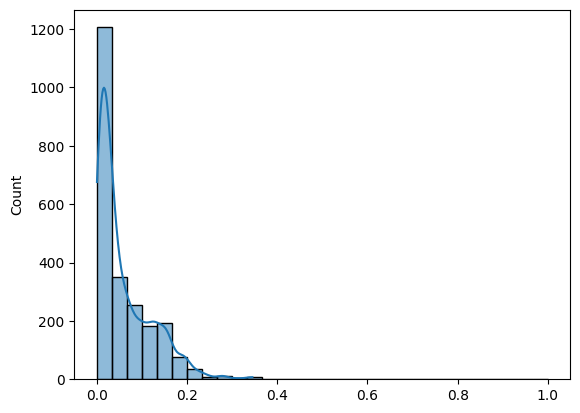

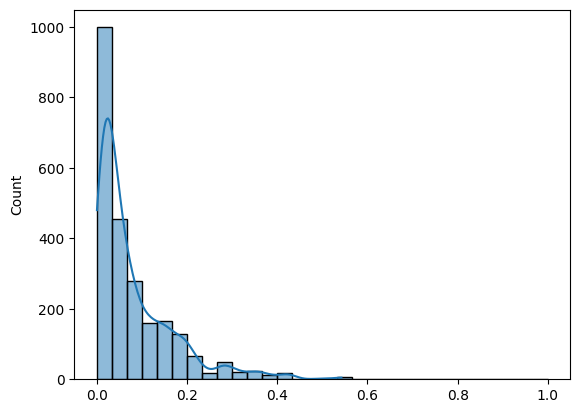

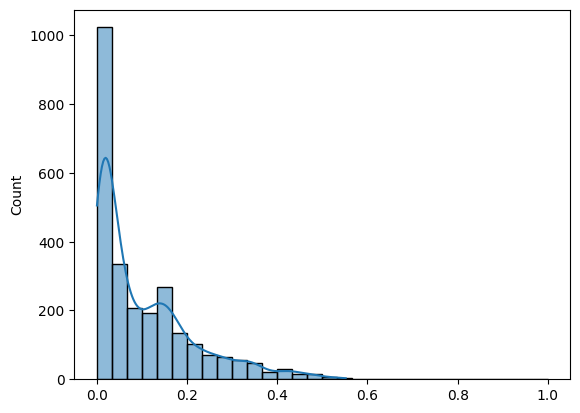

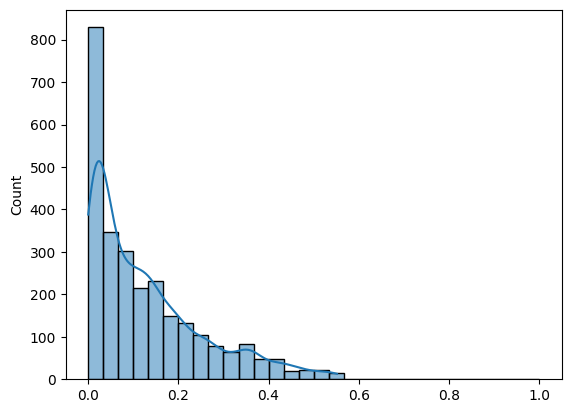

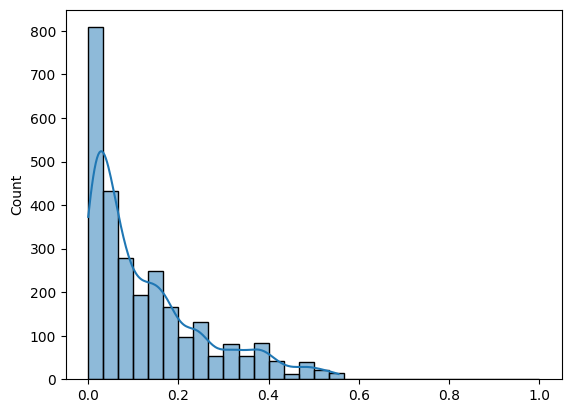

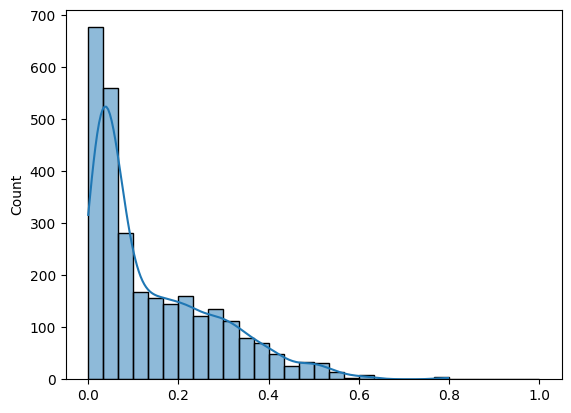

In [107]:
for i in range(7):
    headings = df[df["steps"] == 2000].iloc[i]["weightedHeadings"]
    sns.histplot(x=[h[0]/np.pi for h in headings], weights=[h[1] for h in headings], bins=30, kde=True, binrange=(0.0, 1.0))
    plt.show()


-415.77733058958677 276.9108316888698


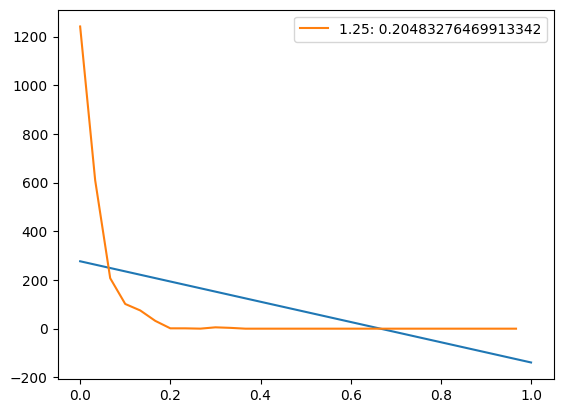

In [122]:
cutoff = 0
bins = 30

for i in range(1):
    _row = df[df["steps"] == 2000].iloc[i]
    headings = _row["weightedHeadings"]
    cost = _row["settings.maxCost"]
    angle = np.arccos(1 / cost) / np.pi
    w, b = np.histogram([h[0] / (np.pi) for h in headings], weights=[h[1] for h in headings], bins=bins, range=(0.0, 1.0))

    slope, intercept = np.polyfit(x=b[cutoff:-1], y=w[cutoff:], deg=1)
    print(slope, intercept)
    x = np.linspace(0, 1, 100)
    y = x * slope + intercept
    sns.lineplot(x=x, y=y)
    sns.lineplot(x=b[cutoff:-1], y=w[cutoff:], label=f"{cost}: {angle}")
    # s.legend()


In [117]:
np.linspace(0, 1, 100)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

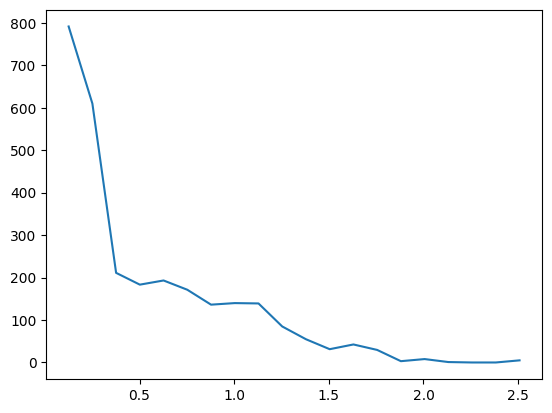

In [52]:
plt.plot(b[1:], w)

In [84]:
np.arccos(1 / 0) / (2 * np.pi)

0.25